In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load data
data = pd.read_csv('../2. models/runtimes/training/training_info.csv')

In [39]:
scatter_data = data.copy()
scatter_data.columns

Index(['model_name', 'adapter_name', 'adapter_config', 'column_name',
       'training_data_length', 'test_data_length', 'training_time',
       'evaluation_time', 'num_params', 'date', 'accuracy', 'precision',
       'recall', 'f1', 'training_loss', 'eval_loss', 'hardware_info',
       'learning_rate', 'batch_size', 'num_epochs', 'seed'],
      dtype='object')

In [40]:
# Define a dictionary mapping the old values to the new values
replace_dict = {
    "LoRAConfig(architecture='lora', selfattn_lora=True, intermediate_lora=False, output_lora=False, leave_out=[], r=8, alpha=8, dropout=0.0, attn_matrices=['q', 'v'], composition_mode='add', init_weights='lora', use_gating=False)": 'LoraConfig',
    '<adapters.configuration.adapter_config.UniPELTConfig object at 0x13c81c4a0>': 'UniPELTConfig',
    '<adapters.configuration.adapter_config.MAMConfig object at 0x344f4f530>': 'MAMConfig',
    '<adapters.configuration.adapter_config.ConfigUnion object at 0x345900800>': 'ConfigUnion',
    '<adapters.configuration.adapter_config.MAMConfig object at 0x343d33200>': 'MAMConfig'
}

# Replace the values
scatter_data['adapter_config'] = scatter_data['adapter_config'].replace(replace_dict)

In [41]:
# Convert 'num_params' to millions
scatter_data['num_params'] = scatter_data['num_params'] / 1000000

# Calculate IQR
Q1 = scatter_data['num_params'].quantile(0.25)
Q3 = scatter_data['num_params'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_data = scatter_data[(scatter_data['num_params'] >= lower_bound) & (scatter_data['num_params'] <= upper_bound)]

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_49632/3316715740.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(adapter_config))


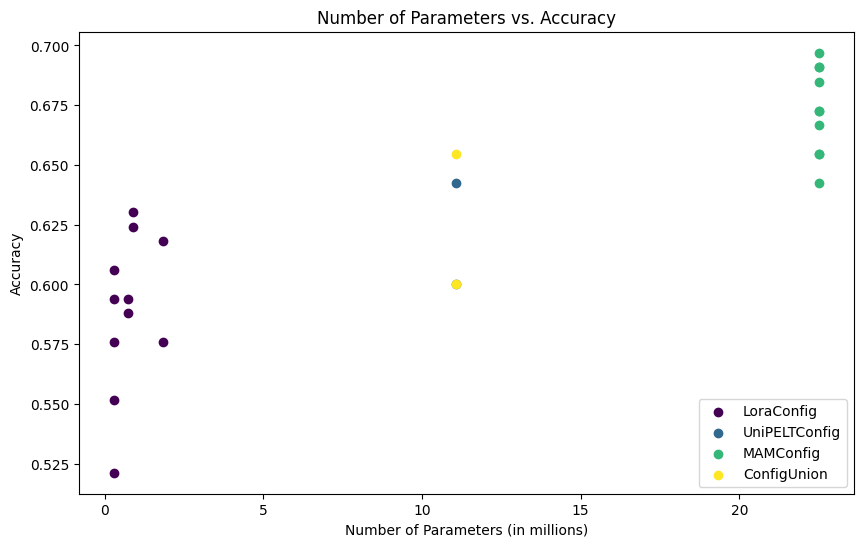

In [42]:

plt.figure(figsize=(10, 6))

# Get unique model names
adapter_config = filtered_data['adapter_config'].unique()

# Create a color map
cmap = plt.cm.get_cmap('viridis', len(adapter_config))

# Plot each adapter separately
for i, adapter in enumerate(adapter_config):
    adapter_data = filtered_data[filtered_data['adapter_config'] == adapter]
    plt.scatter(adapter_data['num_params'], adapter_data['accuracy'], color=cmap(i), label=adapter)

plt.xlabel('Number of Parameters (in millions)')
plt.ylabel('Accuracy')
plt.title('Number of Parameters vs. Accuracy')
plt.legend(loc='lower right')  # Place legend inside plot at the bottom right
# Save the plot to a file
plt.savefig('../5. report/pictures/number_params_vs_accuracy.png')
plt.show()

In [43]:
# Calculate IQR for 'training_time'
Q1 = filtered_data['training_time'].quantile(0.25)
Q3 = filtered_data['training_time'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_data = filtered_data[(filtered_data['training_time'] >= lower_bound) & (filtered_data['training_time'] <= upper_bound)]


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_49632/850681537.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(adapter_config))


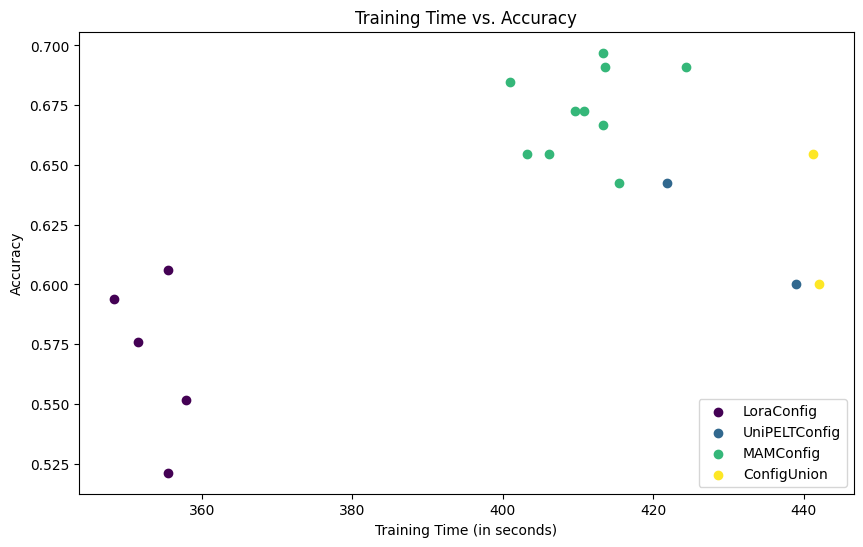

In [44]:

plt.figure(figsize=(10, 6))

# Get unique adapter names
adapter_config = filtered_data['adapter_config'].unique()

# Create a color map
cmap = plt.cm.get_cmap('viridis', len(adapter_config))

# Plot each adapter separately
for i, adapter in enumerate(adapter_config):
    adapter_data = filtered_data[filtered_data['adapter_config'] == adapter]
    plt.scatter(adapter_data['training_time'], adapter_data['accuracy'], color=cmap(i), label=adapter)


plt.xlabel('Training Time (in seconds)')
plt.ylabel('Accuracy')
plt.title('Training Time vs. Accuracy')
plt.legend(loc='lower right')  # Place legend inside plot at the bottom right

# Save the plot to a file
plt.savefig('../5. report/pictures/training_time_vs_accuracy.png')
plt.show()


### Plots to compare all models with adapter_config containing "LoRAConfig" 

/var/folders/cw/2bwvtf5d0vv33v0yz8lw4p6c0000gn/T/ipykernel_11921/777598975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=config_data, x='model_name', y='accuracy', palette='viridis')


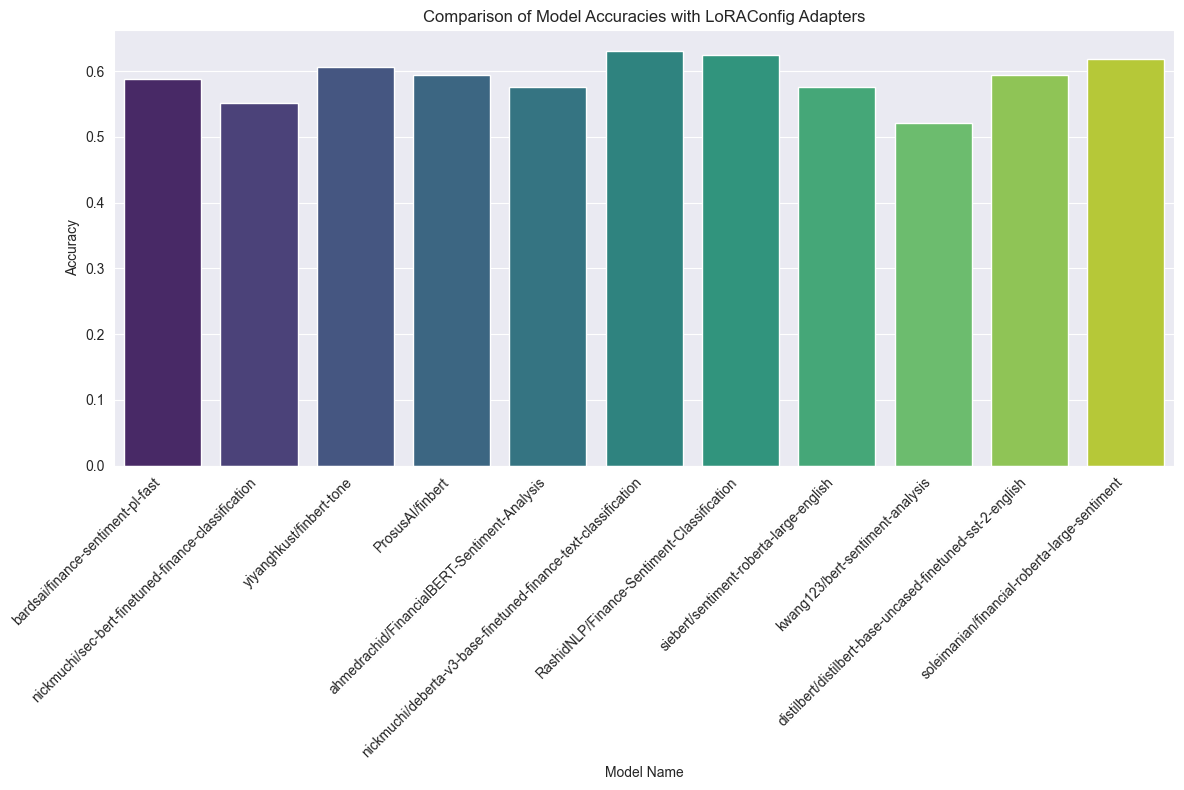

In [3]:
# Filter the data for models with adapter_config containing "LoRAConfig" and plot their accuracy
config_data = data[data['adapter_config'].str.contains('LoRAConfig')]

# Creating the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=config_data, x='model_name', y='accuracy', palette='viridis')
plt.title('Comparison of Model Accuracies with LoRAConfig Adapters')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

/var/folders/cw/2bwvtf5d0vv33v0yz8lw4p6c0000gn/T/ipykernel_11921/3065871332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=config_data, x='model_name', y='f1', palette='viridis')


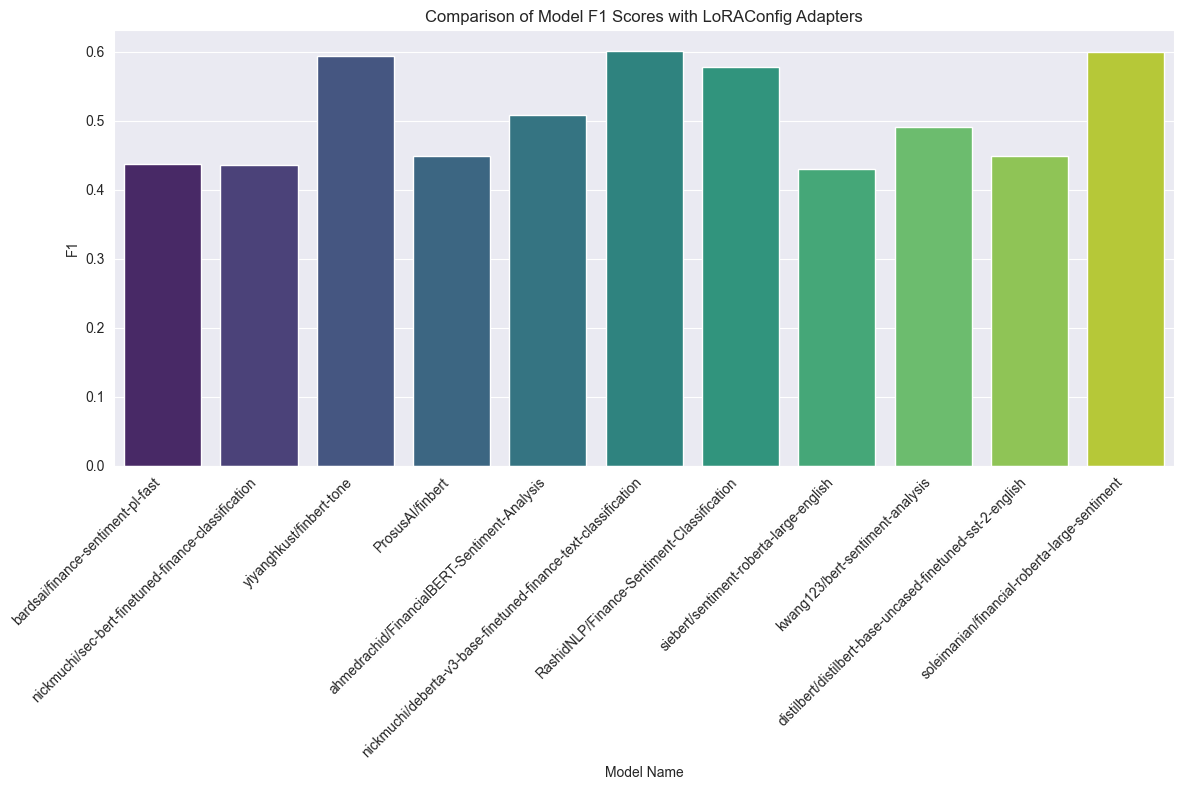

In [4]:
# Filter the data for models with adapter_config containing "LoRAConfig" and plot their F1 score
config_data = data[data['adapter_config'].str.contains('LoRAConfig')]

# Creating the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=config_data, x='model_name', y='f1', palette='viridis')
plt.title('Comparison of Model F1 Scores with LoRAConfig Adapters')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Name')
plt.ylabel('F1')
plt.tight_layout()
plt.show()

/var/folders/cw/2bwvtf5d0vv33v0yz8lw4p6c0000gn/T/ipykernel_11921/2660190984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=config_data, x='model_name', y='precision', palette='viridis')


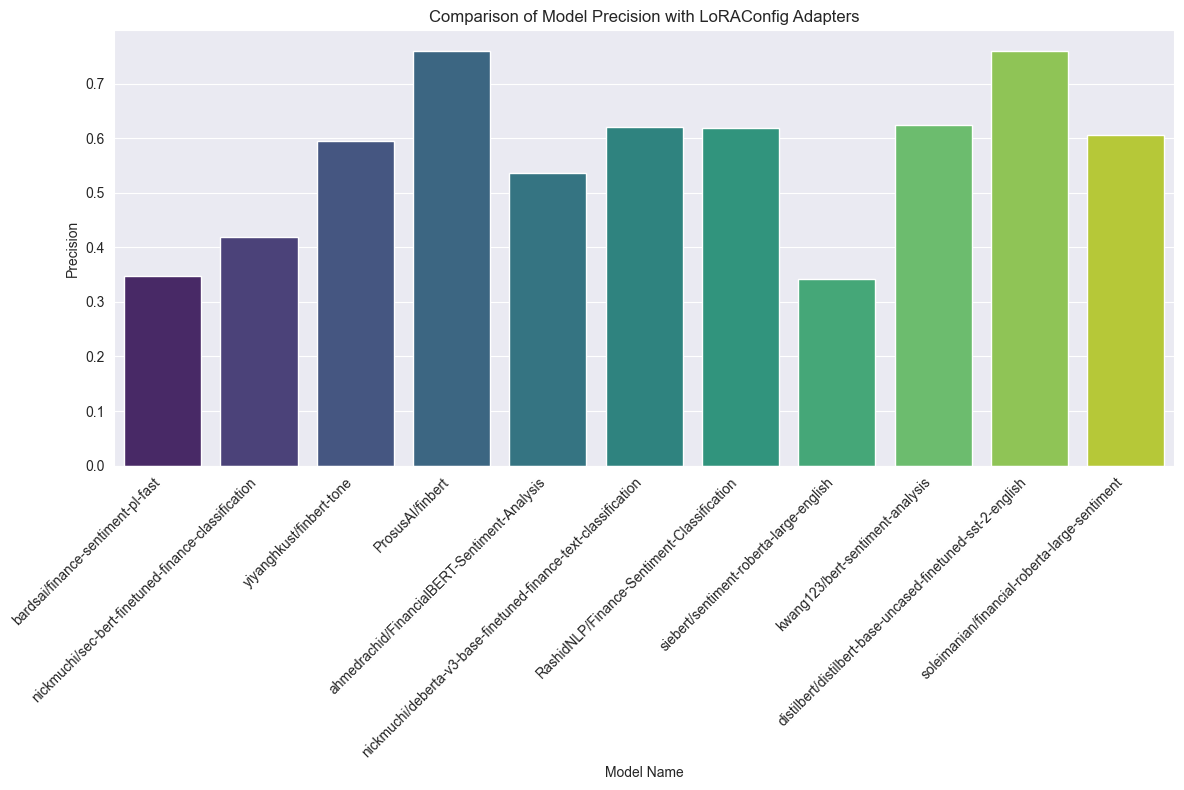

In [5]:
# Filter the data for models with adapter_config containing "LoRAConfig" and plot their precision
config_data = data[data['adapter_config'].str.contains('LoRAConfig')]

# Creating the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=config_data, x='model_name', y='precision', palette='viridis')
plt.title('Comparison of Model Precision with LoRAConfig Adapters')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Name')
plt.ylabel('Precision')
plt.tight_layout()
plt.show()

/var/folders/cw/2bwvtf5d0vv33v0yz8lw4p6c0000gn/T/ipykernel_11921/3186784484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=config_data, x='model_name', y='recall', palette='viridis')


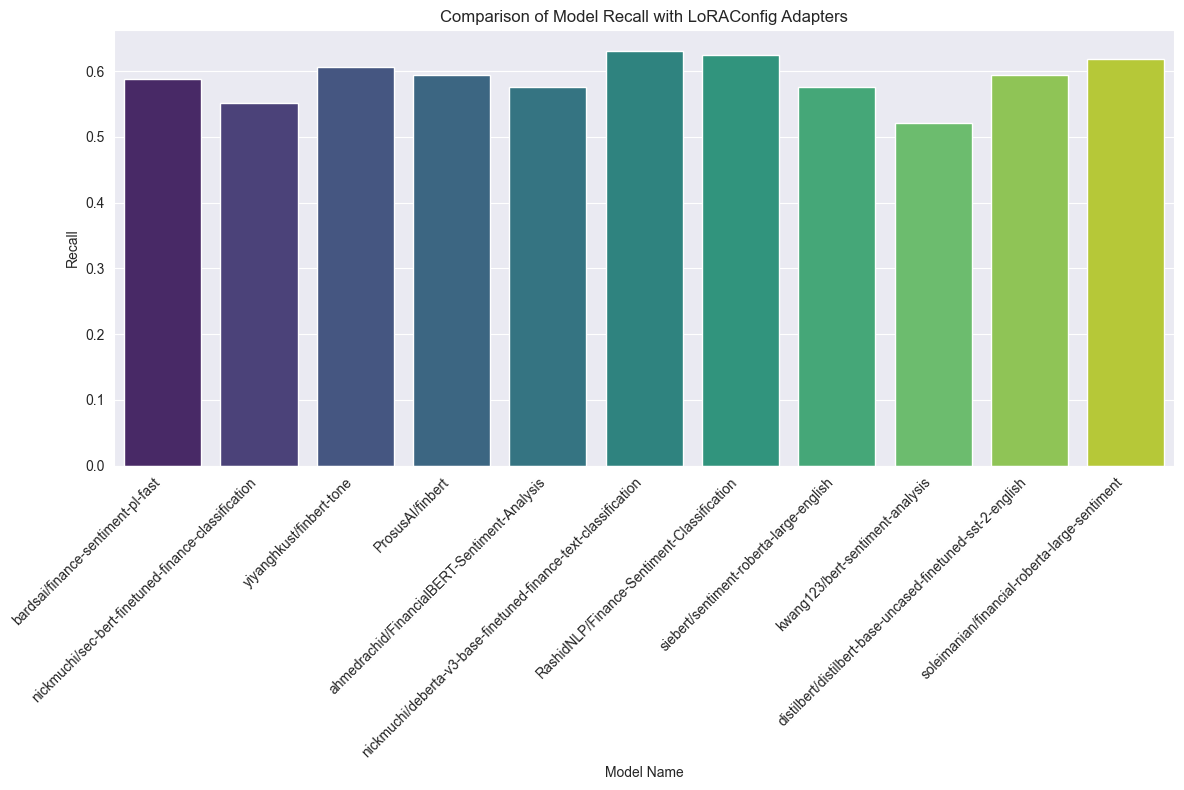

In [6]:
# Filter the data for models with adapter_config containing "LoRAConfig" and plot their recall
config_data = data[data['adapter_config'].str.contains('LoRAConfig')]

# Creating the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=config_data, x='model_name', y='recall', palette='viridis')
plt.title('Comparison of Model Recall with LoRAConfig Adapters')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Name')
plt.ylabel('Recall')
plt.tight_layout()
plt.show()

### Plots to compare all models with adapter_config containing "UniPELTConfig"

/var/folders/cw/2bwvtf5d0vv33v0yz8lw4p6c0000gn/T/ipykernel_84807/2593334387.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lora_config_data, x='model_name', y='f1', palette='viridis')


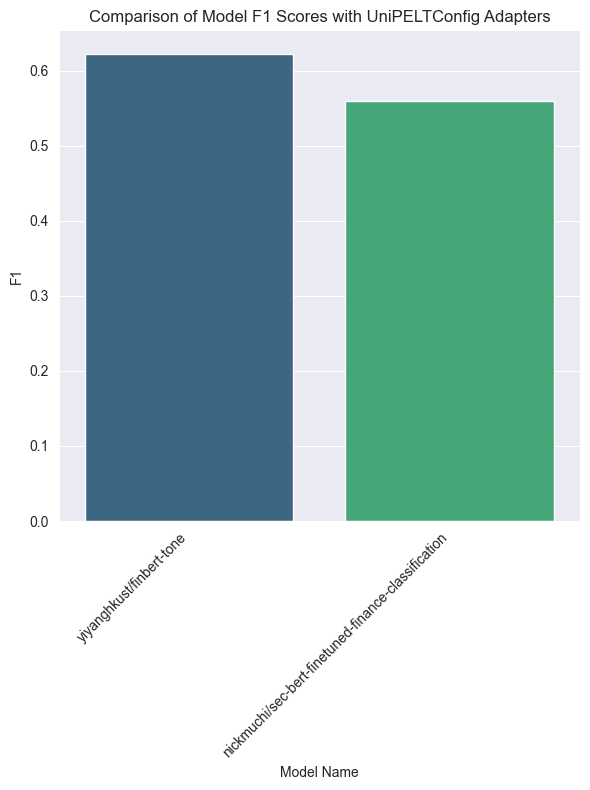

In [11]:
# Filter the data for models with adapter_config containing "UniPELTConfig" and plot their F1 score
config_data = data[data['adapter_config'].str.contains('UniPELTConfig')]

# Creating the plot
plt.figure(figsize=(6, 8))
sns.barplot(data=config_data, x='model_name', y='f1', palette='viridis')
plt.title('Comparison of Model F1 Scores with UniPELTConfig Adapters')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Name')
plt.ylabel('F1')
plt.tight_layout()
plt.show()

/var/folders/cw/2bwvtf5d0vv33v0yz8lw4p6c0000gn/T/ipykernel_84807/1983672066.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lora_config_data, x='model_name', y='accuracy', palette='viridis')


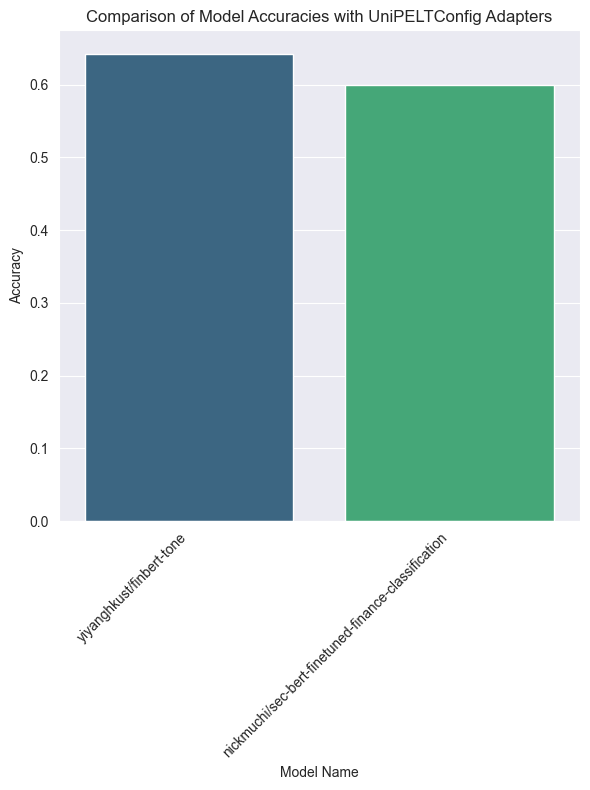

In [12]:
# Filter the data for models with adapter_config containing "UniPELTConfig" and plot their accuracy
config_data = data[data['adapter_config'].str.contains('UniPELTConfig')]

# Creating the plot
plt.figure(figsize=(6, 8))
sns.barplot(data=config_data, x='model_name', y='accuracy', palette='viridis')
plt.title('Comparison of Model Accuracies with UniPELTConfig Adapters')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

### Plots to compare all models with adapter_config containing "MAMConfig"

/var/folders/cw/2bwvtf5d0vv33v0yz8lw4p6c0000gn/T/ipykernel_84807/3836094476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lora_config_data, x='model_name', y='f1', palette='viridis')


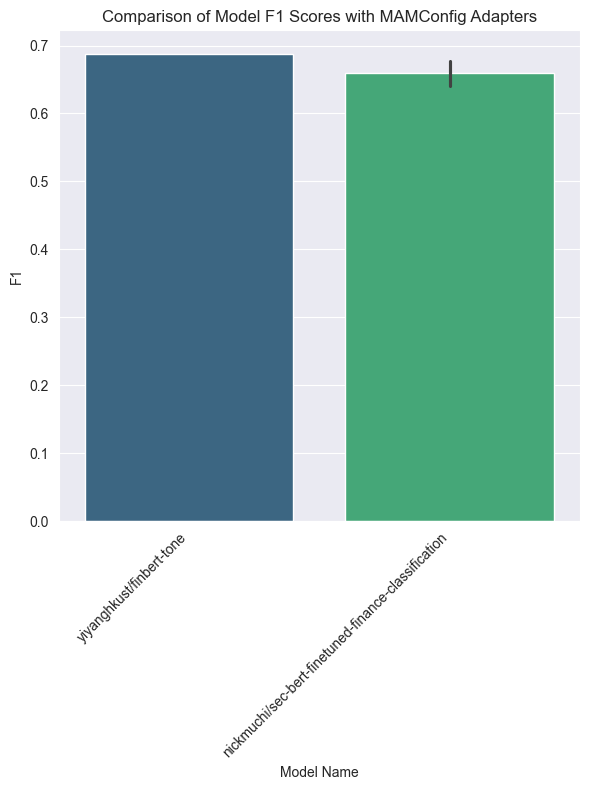

In [14]:
# Filter the data for models with adapter_config containing "MAMConfig" and plot their F1 score
config_data = data[data['adapter_config'].str.contains('MAMConfig')]

# Creating the plot
plt.figure(figsize=(6, 8))
sns.barplot(data=config_data, x='model_name', y='f1', palette='viridis')
plt.title('Comparison of Model F1 Scores with MAMConfig Adapters')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Name')
plt.ylabel('F1')
plt.tight_layout()
plt.show()

/var/folders/cw/2bwvtf5d0vv33v0yz8lw4p6c0000gn/T/ipykernel_84807/2464013307.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lora_config_data, x='model_name', y='accuracy', palette='viridis')


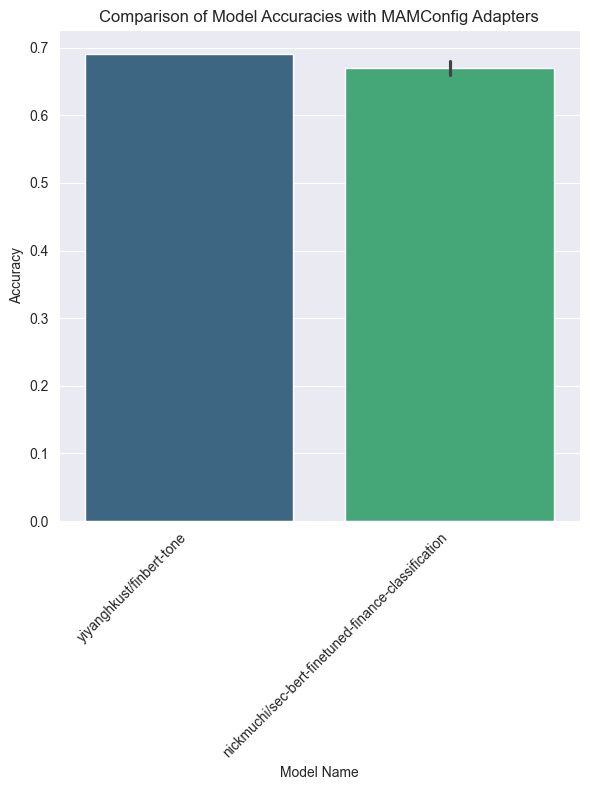

In [15]:
# Filter the data for models with adapter_config containing "MAMConfig" and plot their accuracy
config_data = data[data['adapter_config'].str.contains('MAMConfig')]

# Creating the plot
plt.figure(figsize=(6, 8))
sns.barplot(data=config_data, x='model_name', y='accuracy', palette='viridis')
plt.title('Comparison of Model Accuracies with MAMConfig Adapters')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

### Plots to compare all models with adapter_config containing "MAMConfig" and column_name "FinancialStrengthText"

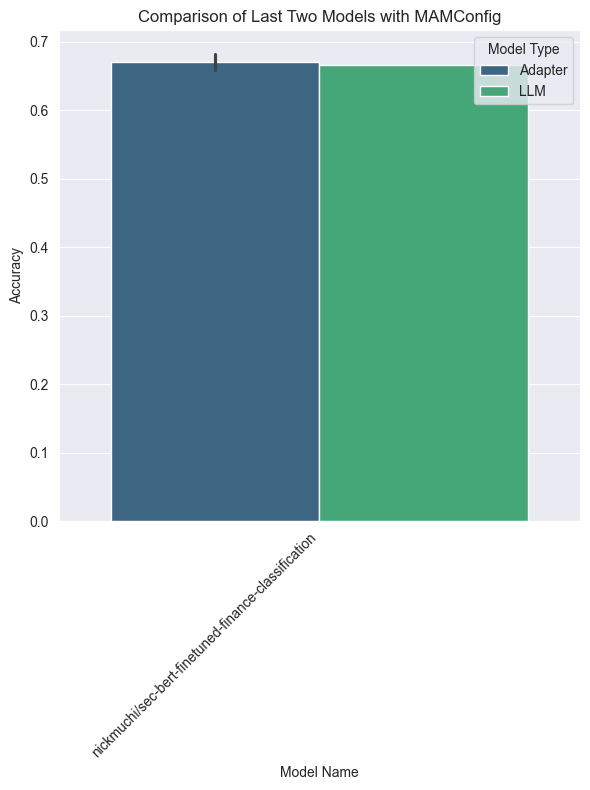

In [20]:
# Filtering for models that have the specific MAMConfig object addresses
mam_adapter_model = data[data['adapter_config'].str.contains('0x343d33200')]
mam_llm_model = data[data['adapter_config'].str.contains('0x12a3dc8c0')]

# Combined data for plotting
comparison_data = pd.concat([mam_adapter_model, mam_llm_model])

comparison_data['Adapter Type'] = comparison_data['adapter_config'].replace({
    '.*0x343d33200.*': 'Adapter',
    '.*0x12a3dc8c0.*': 'LLM'
}, regex=True)

# Creating the plot
plt.figure(figsize=(6, 8))
sns.barplot(data=comparison_data, x='model_name', y='accuracy', hue='Adapter Type', palette='viridis')
plt.title('Comparison of Last Two Models with MAMConfig')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Type')
plt.tight_layout()
plt.show()

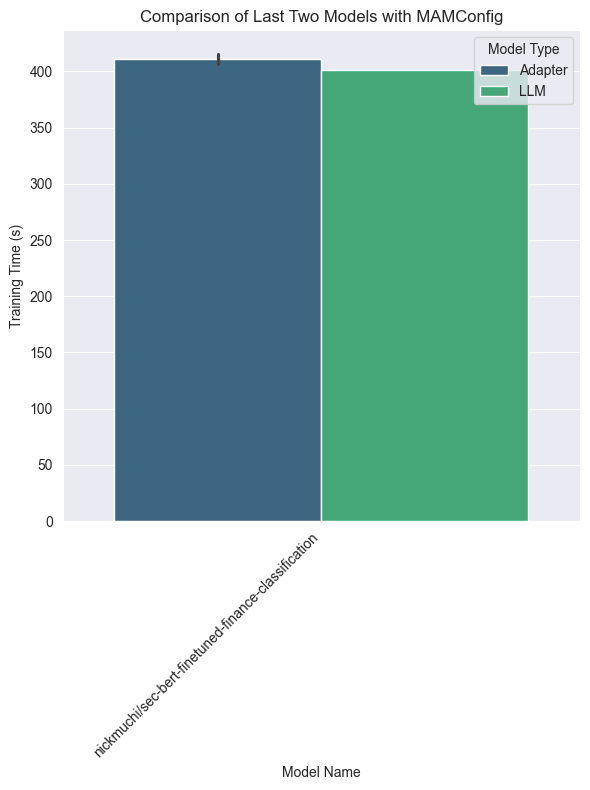

In [21]:
# Filtering for models that have the specific MAMConfig object addresses
mam_adapter_model = data[data['adapter_config'].str.contains('0x343d33200')]
mam_llm_model = data[data['adapter_config'].str.contains('0x12a3dc8c0')]

# Combined data for plotting
comparison_data = pd.concat([mam_adapter_model, mam_llm_model])

comparison_data['Adapter Type'] = comparison_data['adapter_config'].replace({
    '.*0x343d33200.*': 'Adapter',
    '.*0x12a3dc8c0.*': 'LLM'
}, regex=True)

# Creating the plot
plt.figure(figsize=(6, 8))
sns.barplot(data=comparison_data, x='model_name', y='training_time', hue='Adapter Type', palette='viridis')
plt.title('Comparison of Last Two Models with MAMConfig')
plt.xlabel('Model Name')
plt.ylabel('Training Time (s)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Type')
plt.tight_layout()
plt.show()

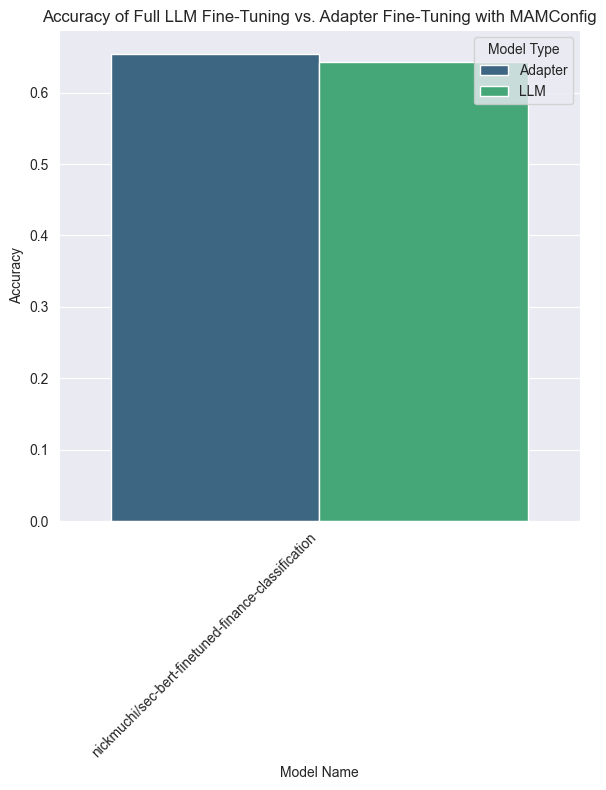

In [8]:
# Filtering for models that have the specific MAMConfig object addresses
mam_adapter_model = data[data['adapter_config'].str.contains('0x3333fb740')]
mam_llm_model = data[data['adapter_config'].str.contains('0x3507a46b0')]

# Combined data for plotting
comparison_data = pd.concat([mam_adapter_model, mam_llm_model])

comparison_data['Adapter Type'] = comparison_data['adapter_config'].replace({
    '.*0x3333fb740.*': 'Adapter',
    '.*0x3507a46b0.*': 'LLM'
}, regex=True)

# Creating the plot
plt.figure(figsize=(6, 8))
sns.barplot(data=comparison_data, x='model_name', y='accuracy', hue='Adapter Type', palette='viridis')
plt.title('Accuracy of Full LLM Fine-Tuning vs. Adapter Fine-Tuning with MAMConfig')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Type')
plt.tight_layout()
plt.show()

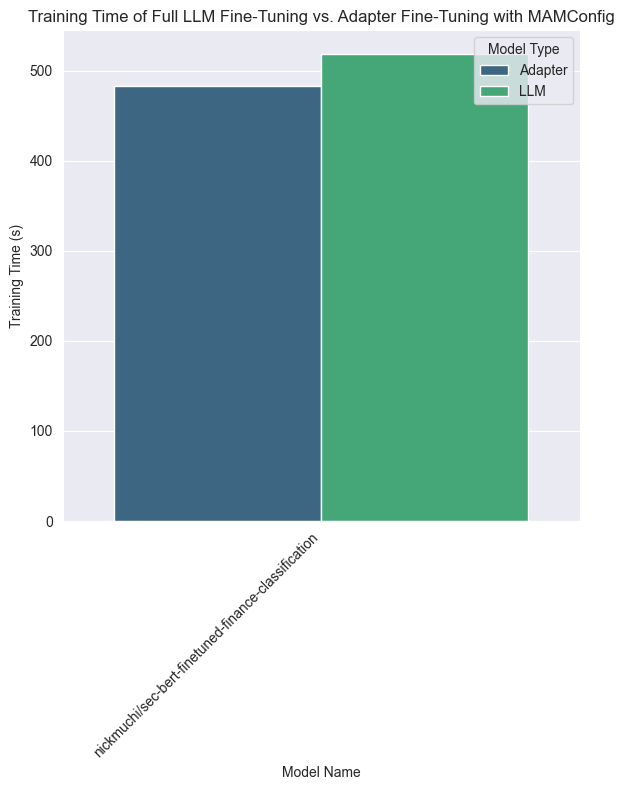

In [9]:
# Filtering for models that have the specific MAMConfig object addresses
mam_adapter_model = data[data['adapter_config'].str.contains('0x3333fb740')]
mam_llm_model = data[data['adapter_config'].str.contains('0x3507a46b0')]

# Combined data for plotting
comparison_data = pd.concat([mam_adapter_model, mam_llm_model])

comparison_data['Adapter Type'] = comparison_data['adapter_config'].replace({
    '.*0x3333fb740.*': 'Adapter',
    '.*0x3507a46b0.*': 'LLM'
}, regex=True)

# Creating the plot
plt.figure(figsize=(6, 8))
sns.barplot(data=comparison_data, x='model_name', y='training_time', hue='Adapter Type', palette='viridis')
plt.title('Training Time of Full LLM Fine-Tuning vs. Adapter Fine-Tuning with MAMConfig')
plt.xlabel('Model Name')
plt.ylabel('Training Time (s)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Type')
plt.tight_layout()
plt.show()